### Import the GitHub Project

In [111]:
!rm -rf project #remove if it already exists 
!git clone https://github.com/B4Farouk/smpl-dr-clip project
!rm -rf sample_data

Cloning into 'project'...
remote: Enumerating objects: 412, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 412 (delta 39), reused 30 (delta 14), pack-reused 334
Receiving objects: 100% (412/412), 54.96 MiB | 26.33 MiB/s, done.
Resolving deltas: 100% (233/233), done.


### Install Dependencies
---
- pytorch (1.12.1)
- torchvision (0.13.1)
---
- pytorch3d
---
- SMPL
- chumpy

In [58]:
import os
import sys

In [59]:
# install torch
try:
    import torch
    if torch.__version__ != "1.12.1":
      raise ModuleNotFoundError()
except ModuleNotFoundError:
    !pip install torch==1.12.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install torchvision
try:
    import torchvision
    if torchvision.__version__ != "0.13.1":
      raise ModuleNotFoundError()
except ModuleNotFoundError:
    !pip install torchvision==0.13.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# install pytorch3d
import torch, torchvision

try:
    import pytorch3d
except ModuleNotFoundError:
    if torch.__version__.startswith("1.12.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !curl -LO https://github.com/NVIDIA/cub/archive/1.10.0.tar.gz
        !tar xzf 1.10.0.tar.gz
        os.environ["CUB_HOME"] = os.getcwd() + "/cub-1.10.0"
        !pip install pytorch3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.1 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221122-py3-none-any.whl size=61484 sha256=d49d779054276d6b9d3232d876af97967d3f4cc24786037a8a44747cd31a44b4
  Stored in directory: /root/.cache/pip/wheels/15/6e/e3/602889ca9c5c55020f8d205066445ac5b1b96df59f75170ca0
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31547 sha256=228f8b2455273ca052ff87c068992f312bbe6586f2e3517982c3928f6417942a
  Stored in directory: /root/.cache/pip/wheels/89/3e/24/0f349c0b2eeb6965903035f3b00dbb5c9bea437b4a2f18d82c
Successfully built fvcore iopath
Looking in links: https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py38_cu113_pyt1121/download.html
     |████████████████████████████████| 47.2 MB 1.2 MB/s 


In [6]:
# install SMPL dependencies
!pip install smplpytorch
!pip install chumpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.7 MB/s 
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58286 sha256=1b5da40b904137ae1dced5c0a9392fc6271e77b3d0d9c77aed9fae07fc3f5b6c
  Stored in directory: /root/.cache/pip/wheels/d9/a2/b8/b8aeeeaeb01b5002085156add1aed832f2fb03e79d0f22dfed
Successfully built chumpy


In [7]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-yqspqfk_
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-yqspqfk_
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=7694bf21b770e43b5238b8452ff16aa4bd8316f3db8e23031ce16f8941f255e0
  Stored in directory: /tmp/pip-ephem-wheel-cache-76djxsgq/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
Successfully built clip


### GPU

In [8]:
torch.cuda.is_available()

True

In [9]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [10]:
# GPU or CPU
gpu, cpu = None, None
if torch.cuda.is_available():
    gpu = torch.device("cuda:0")
    torch.cuda.set_device(gpu)
else:
    cpu = torch.device("cpu")
dev = gpu if gpu is not None else cpu
dev

device(type='cuda', index=0)

### Local Imports 

In [112]:
from project.smpl import SMPLwrapper, mesh_from
from project.textures import TexturesFactory

from project.rendering import CamerasFactory, Renderer

from project.clip import CLIPwrapper

from project.plots import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### SMPL

In [113]:
# initalize a textures factory
txfactory = TexturesFactory(device=dev)
# use the texture factory to create a texture generator: a function that takes faces and creates a texture
def texture_generator(faces):
  nfaces = len(faces[0])
  texture = txfactory.from_facecolor(nfaces=nfaces, facecolor=(0.5, 0.5, 0.5))
  return texture
# pose and shape initalization
pose_vect = torch.zeros((1, 72), device=dev) # theta, not used in optimization
shape_vect = torch.ones((1, 10), device=dev) # beta, not used in optimization
# create the smpl model
smpl_model = SMPLwrapper(model=None, txmapping=texture_generator, device=dev) #model=None uses the default model
# create the mesh
mesh = smpl_model.mesh(theta=pose_vect, beta=shape_vect)

### Differentiable Renderer

In [116]:
# create a cameras factory
camsfactory = CamerasFactory(device=dev)
# create a camera using the cameras factory
camera = camsfactory.fov_persp_scs(coords=(2.25, 0, 10), fov=60, frustrum_depth=(1, 100))
# create a renderer
renderer = Renderer(device=dev, cameras=camera)
# render the textured mesh generated by SMPL
image = renderer.render(mesh)

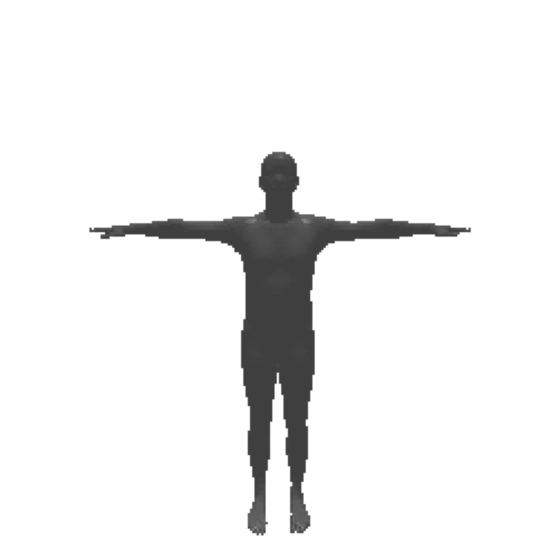

In [117]:
# a quick visualization of the rendered mesh
plot_image_t(image);

### CLIP

In [118]:
import clip
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [119]:
clip_model = CLIPwrapper(model_name="ViT-B/32", device=dev)

In [120]:
def info_str(tensor):
    print("### tensor info:")
    print("shape: " + str(tensor.shape))
    print("device: " + str(tensor.get_device()))
    print("requires grad: " + str(tensor.requires_grad))
    print("### end of tensor info\n")

In [121]:
info_str(image)

### tensor info:
shape: torch.Size([1, 244, 244, 4])
device: 0
requires grad: False
### end of tensor info



In [122]:
info_str(clip_model.proc_image_t(image))

### tensor info:
shape: torch.Size([3, 244, 244])
device: 0
requires grad: False
### end of tensor info



In [123]:
info_str(clip_model.image_embedding(image))

### tensor info:
shape: torch.Size([1, 512])
device: 0
requires grad: True
### end of tensor info



In [124]:
info_str(clip_model.prompt_embedding(prompt="abcd, efghij''-klmnopqrst uvwxyz 0123 456 789"))

### tensor info:
shape: torch.Size([1, 512])
device: 0
requires grad: True
### end of tensor info



In [125]:
import torch.nn as nn
cos_sim = nn.CosineSimilarity(dim=1, eps=1e-8)
cos_dist = lambda x, y: 1 - cos_sim(x, y)
cos_dist(clip_model.prompt_embedding("a human"), clip_model.prompt_embedding("a man"))

tensor([0.0869], device='cuda:0', dtype=torch.float16, grad_fn=<RsubBackward1>)

### Optimization

In [126]:
from project.optimization import OptimEnv, init_weights
from project.model import compose

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [227]:
clip_model.train() # set clip in training mode
model = compose(smpl=smpl_model, renderer=renderer, clip=clip_model, prompt="""
a grey mannequin in a white background. He is looking upfront. He is standing on his feet. His hands are up.""")

In [228]:
pose, shape = init_weights(device=dev) # weights used in optimization

In [229]:
torch.norm(pose).item()

0.0

In [230]:
torch.norm(shape).item()

3.1622776985168457

In [232]:
optimenv = OptimEnv(model=model, params=[pose, shape], lr=1e-3) # we do not optimize with respect to the shape
result = optimenv.optimize(pose=pose, shape=shape, n_passes=1000, tracker_settings={"loss":{"interleaving": 10}, "pose": {"interleaving": 100}})

In [233]:
torch.norm(pose).item()

1.732146978378296

In [234]:
torch.norm(shape).item()

3.378740072250366

In [235]:
result["tracked"]["losses"]["loss"].min(), result["tracked"]["losses"]["loss"].max() 

(0.66015625, 0.6826171875)

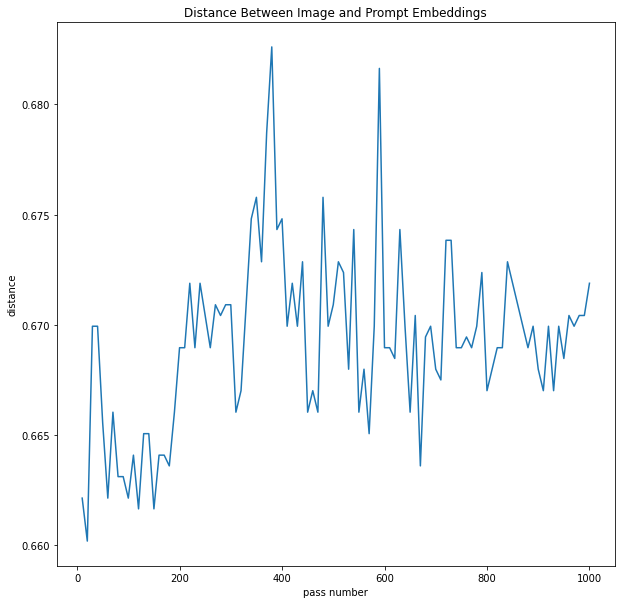

In [236]:
plot_losses(result["tracked"]["losses"])

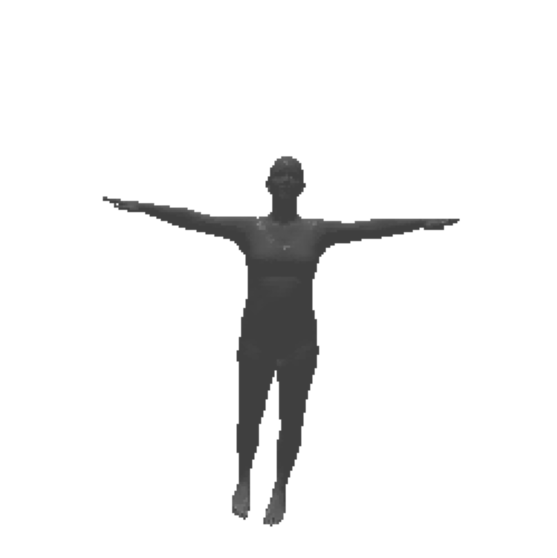

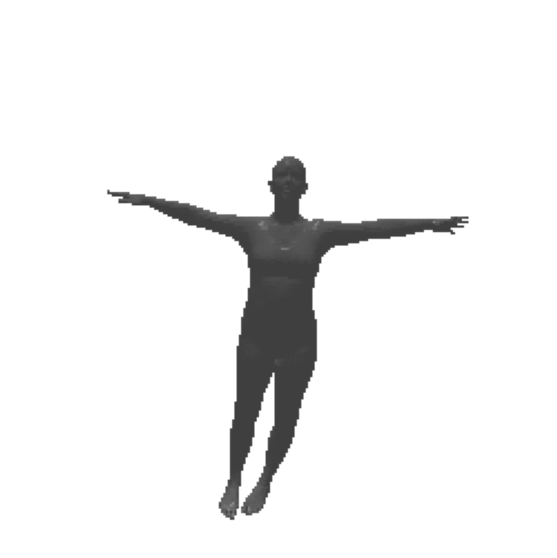

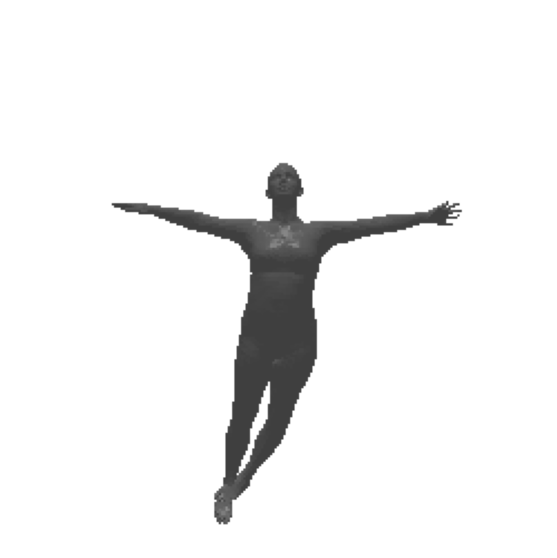

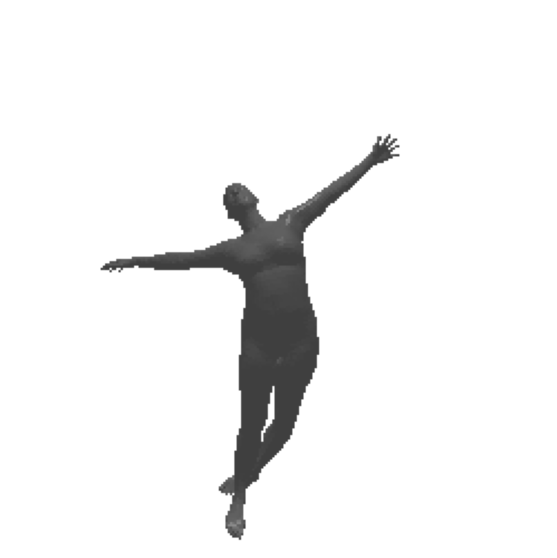

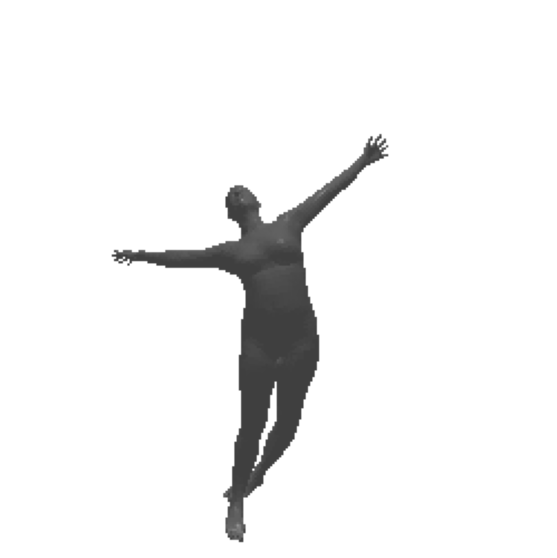

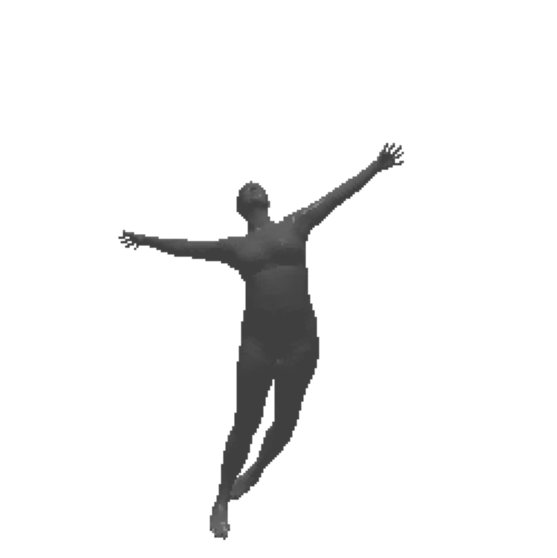

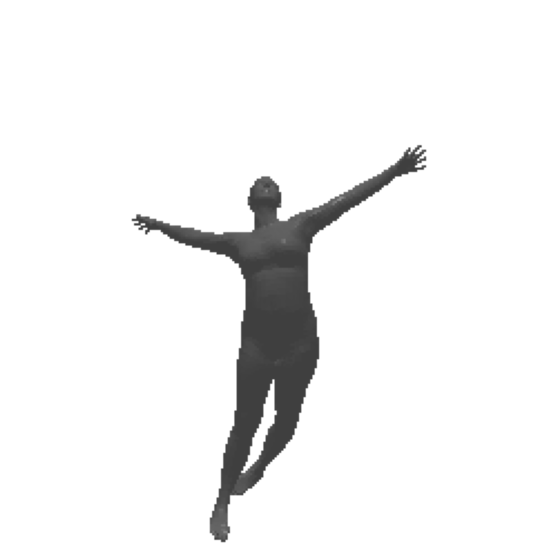

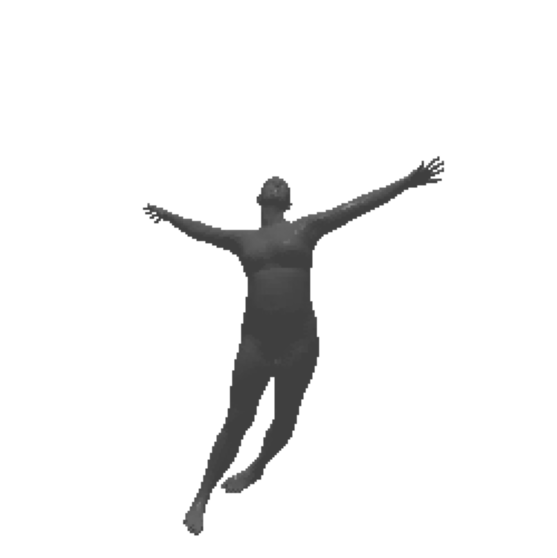

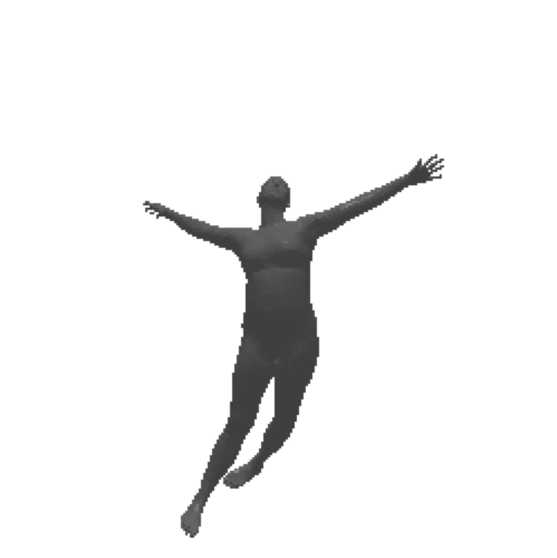

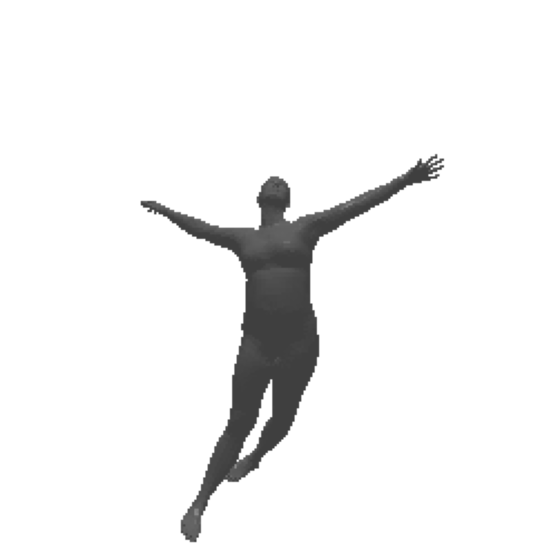

In [237]:
# create a camera using the cameras factory
camera2 = camsfactory.fov_persp_scs(coords=(2.25, 0, 10), fov=60, frustrum_depth=(1, 100))
# create a renderer
renderer2 = Renderer(device=dev, cameras=camera2)

for intermediate_pose in result["tracked"]["poses"]["pose"]:
  intermediate_pose = intermediate_pose.to(dev)
  # create the mesh
  mesh2 = smpl_model.mesh(theta=intermediate_pose, beta=shape)
  image2 = renderer2.render(mesh2)
  # a quick visualization of the rendered mesh
  plot_image_t(image2)